# Explore data
Get descriptive stats and visuals for the 6 groups with current datasets

In [25]:
import pandas as pd
import glob

In [26]:
files = glob.glob("twitter_output/Group*.csv")

In [27]:
def ori_df_to_visual_df(filename, groupname):
    df = pd.read_csv(filename).drop_duplicates().reset_index(drop = True)
    
    print(groupname)
    print("Length of data        ", len(df))
    print("Unique users          ", len(set(df.screen_names)))
    print("Retweets              ", len(df[df["retweets"] == True]))
    print("Retweets from tweets  ", len(df[df["retweets"] == True])/len(df))
    print("Screen_names          ", df.screen_names.unique())
    print("-----------------------------------")
    
    df["created_at"] = pd.to_datetime(df["created_at"], utc=True)
    df['just_date'] = df['created_at'].dt.date
    #df_date = df[["just_date", "id_str"]]
    
    df0 = df.groupby('just_date')['id_str'].count()
    df_date = df0.to_frame().reset_index().rename(columns={"id_str": "count"})
    
    return df_date

In [28]:
df0 = ori_df_to_visual_df(files[0], "Group1")
df1 = ori_df_to_visual_df(files[1], "Group2")
df2 = ori_df_to_visual_df(files[2], "Group3")
df3 = ori_df_to_visual_df(files[3], "Group4")
df4 = ori_df_to_visual_df(files[4], "Group5")
df5 = ori_df_to_visual_df(files[5], "Group6")

Group1
Length of data         5816
Unique users           5
Retweets               310
Retweets from tweets   0.05330123796423659
Screen_names           ['AllanSchmidt' 'GringoWalking' 'TobiasPetersen_' 'gaard_Hans'
 'torstenfroling']
-----------------------------------
Group2
Length of data         4619
Unique users           4
Retweets               134
Retweets from tweets   0.029010608356787183
Screen_names           ['StoltSlaveEjer' 'BrianMork' 'cc02aa2aecb8441' 'memiliussen']
-----------------------------------
Group3
Length of data         522
Unique users           4
Retweets               82
Retweets from tweets   0.15708812260536398
Screen_names           ['ForeningenFar' 'LasseAndersenn' '1976Bullet' 'AndersWendtJens']
-----------------------------------
Group4
Length of data         1335
Unique users           3
Retweets               349
Retweets from tweets   0.2614232209737828
Screen_names           ['Snaphanen' 'MorKarins' 'Andreas34764773']
---------------------------

## Visualize over time

In [22]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pyplot_themes as themes

In [23]:
files

['twitter_output\\Group1_non_feminist.csv',
 'twitter_output\\Group2_anti_feminist.csv',
 'twitter_output\\Group3_pro_dad.csv',
 'twitter_output\\Group4_right_wing.csv',
 'twitter_output\\Group5_pseudo_nazi.csv',
 'twitter_output\\Group6_ethno_nationalistic.csv']

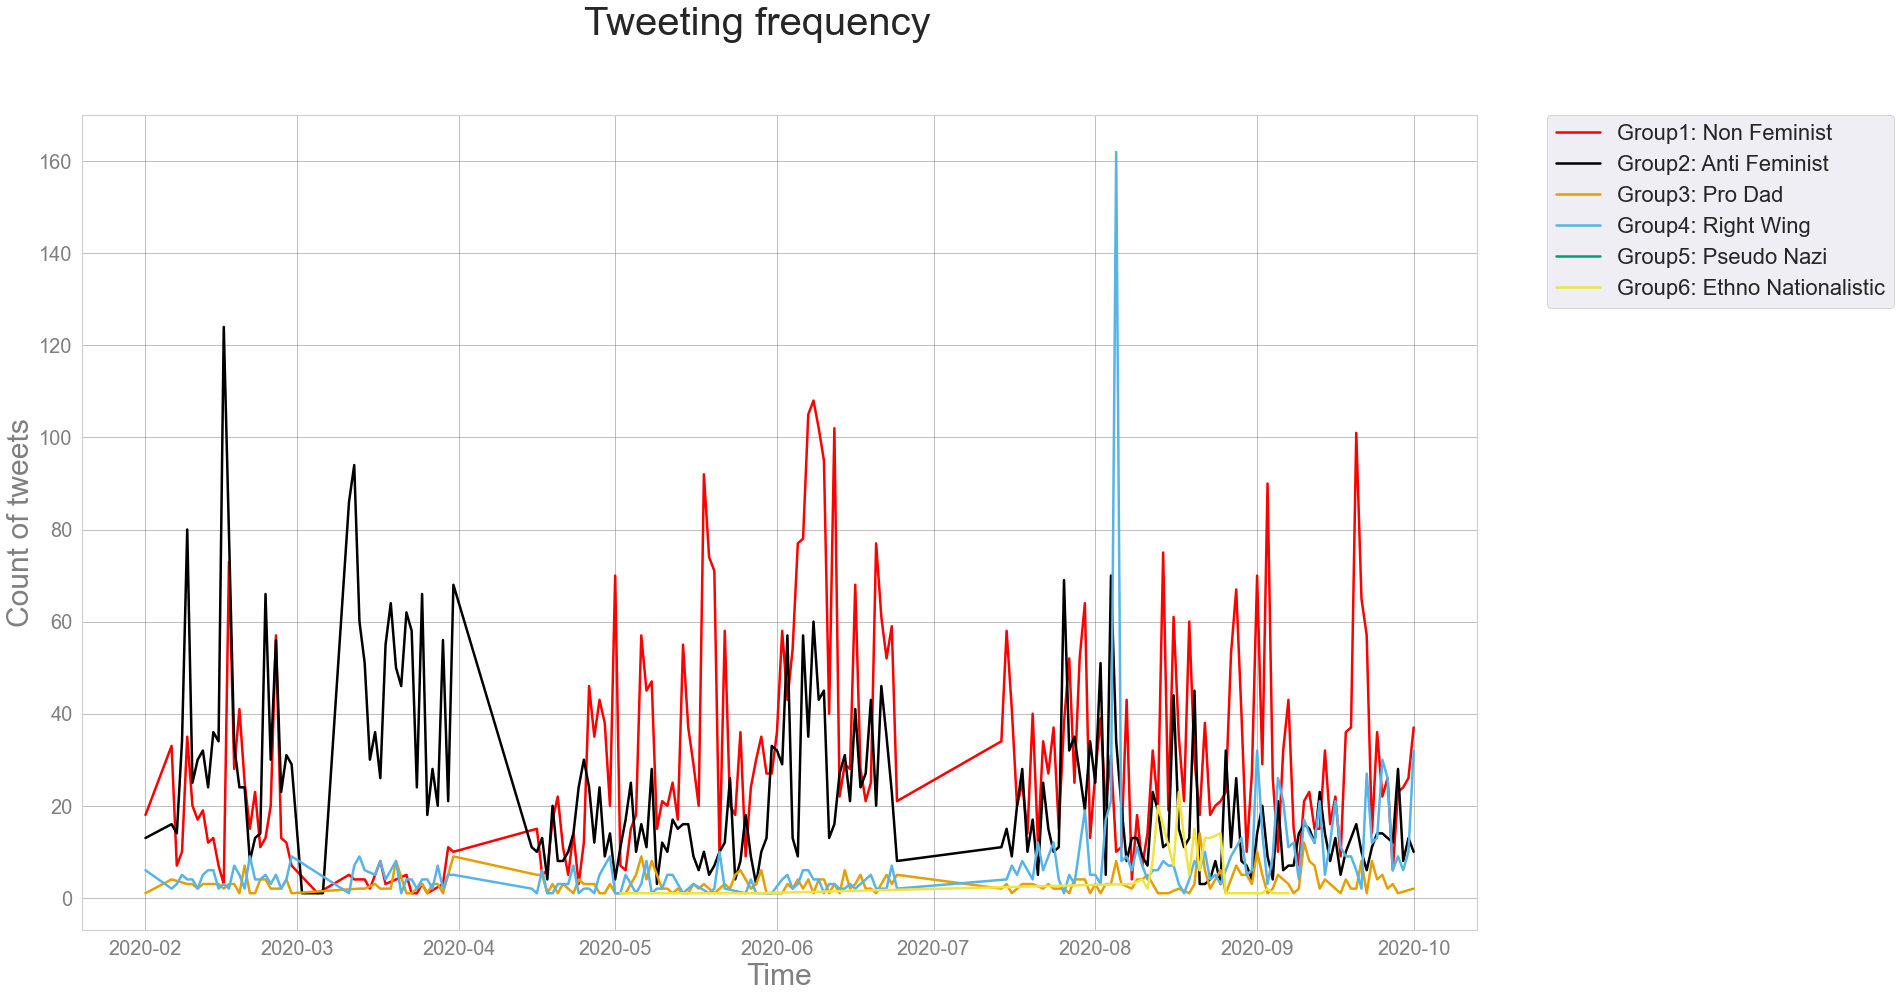

In [7]:
#df = df.loc[df['Hashtag'].isin(['#china', "#opinion"])]
#nr_hash = len(df["Hashtag"].unique())

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

#palette = sns.color_palette("inferno", nr_hash)


fig, ax = plt.subplots(figsize=a4_dims)
sns.set(font_scale = 2)

ax = sns.lineplot(x="just_date", y="count", 
                  label = "Group1: Non Feminist",
                  color = "red",
                  linewidth = 2.5, data = df0)
ax = sns.lineplot(x="just_date", y="count", 
                  label = "Group2: Anti Feminist",
                  linewidth = 2.5, data = df1)
ax = sns.lineplot(x="just_date", y="count", 
                  label = "Group3: Pro Dad",
                  linewidth = 2.5, data = df2)
ax = sns.lineplot(x="just_date", y="count", 
                  label = "Group4: Right Wing",
                  linewidth = 2.5, data = df3)
ax = sns.lineplot(x="just_date", y="count", 
                  label = "Group5: Pseudo Nazi",
                  linewidth = 2.5, data = df4)
ax = sns.lineplot(x="just_date", y="count", 
                  label = "Group6: Ethno Nationalistic",
                  linewidth = 2.5, data = df5)

ax.set(xlabel="Time", ylabel = "Count of tweets")
ax.xaxis.get_label().set_fontsize(30)
ax.yaxis.get_label().set_fontsize(30)
fig.suptitle('Tweeting frequency', fontsize=40)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

#plt.ylim(0, 80)

## Check what a retweet timeline could look like

In [48]:
df = pd.read_csv(files[2]).drop_duplicates().reset_index(drop = True)

df["date"] = pd.to_datetime(df["created_at"], utc = True).dt.strftime('%Y-%m-%d')
df[df["retweets"] == True]

,created_at,id_str,text,retweets,screen_names,date
0,2020-03-20 20:00:03,1241092159001985025,RT @Rigspoliti: Det er egentlig ret simpelt #c...,True,ForeningenFar,2020-03-20
1,2020-03-25 18:23:18,1242879748084285445,"RT @regeringDK: Tak til alle, der passer på os...",True,ForeningenFar,2020-03-25
7,2020-04-17 18:07:50,1251210776859328513,RT @AntiDanmark: DR Ramasjang i dag: Tre små b...,True,1976Bullet,2020-04-17
8,2020-04-17 18:11:25,1251211679301603328,"RT @KatrineVillar: Altså, forklar mig lige hvo...",True,1976Bullet,2020-04-17
9,2020-04-17 18:13:25,1251212182085402625,RT @mediemedicin: Psst. Der er cirka lige så m...,True,1976Bullet,2020-04-17
...,...,...,...,...,...,...
496,Wed Jul 15 20:31:16 +0000 2020,1283499393933545474,"RT @SinkbS: @DavidTrads Temmeligt usympatisk, ...",True,LasseAndersenn,2020-07-15
497,Wed Jul 15 20:24:41 +0000 2020,1283497738257260546,RT @DianeDybdal: Der går rygter om at Frederik...,True,LasseAndersenn,2020-07-15
505,Thu Feb 27 21:27:00 +0000 2020,1233141506908852225,RT @ForeningenFar: Flere stater i USA har indf...,True,1976Bullet,2020-02-27
509,Wed Mar 25 18:23:18 +0000 2020,1242879748084285445,"RT @regeringDK: Tak til alle, der passer på os...",True,ForeningenFar,2020-03-25


In [49]:
df[df["date"] == "2020-04-23"]

,created_at,id_str,text,retweets,screen_names,date
22,2020-04-23 05:09:34,1253189249177968642,Omfattende ikke tilladt kønsdiskrimination af ...,False,ForeningenFar,2020-04-23


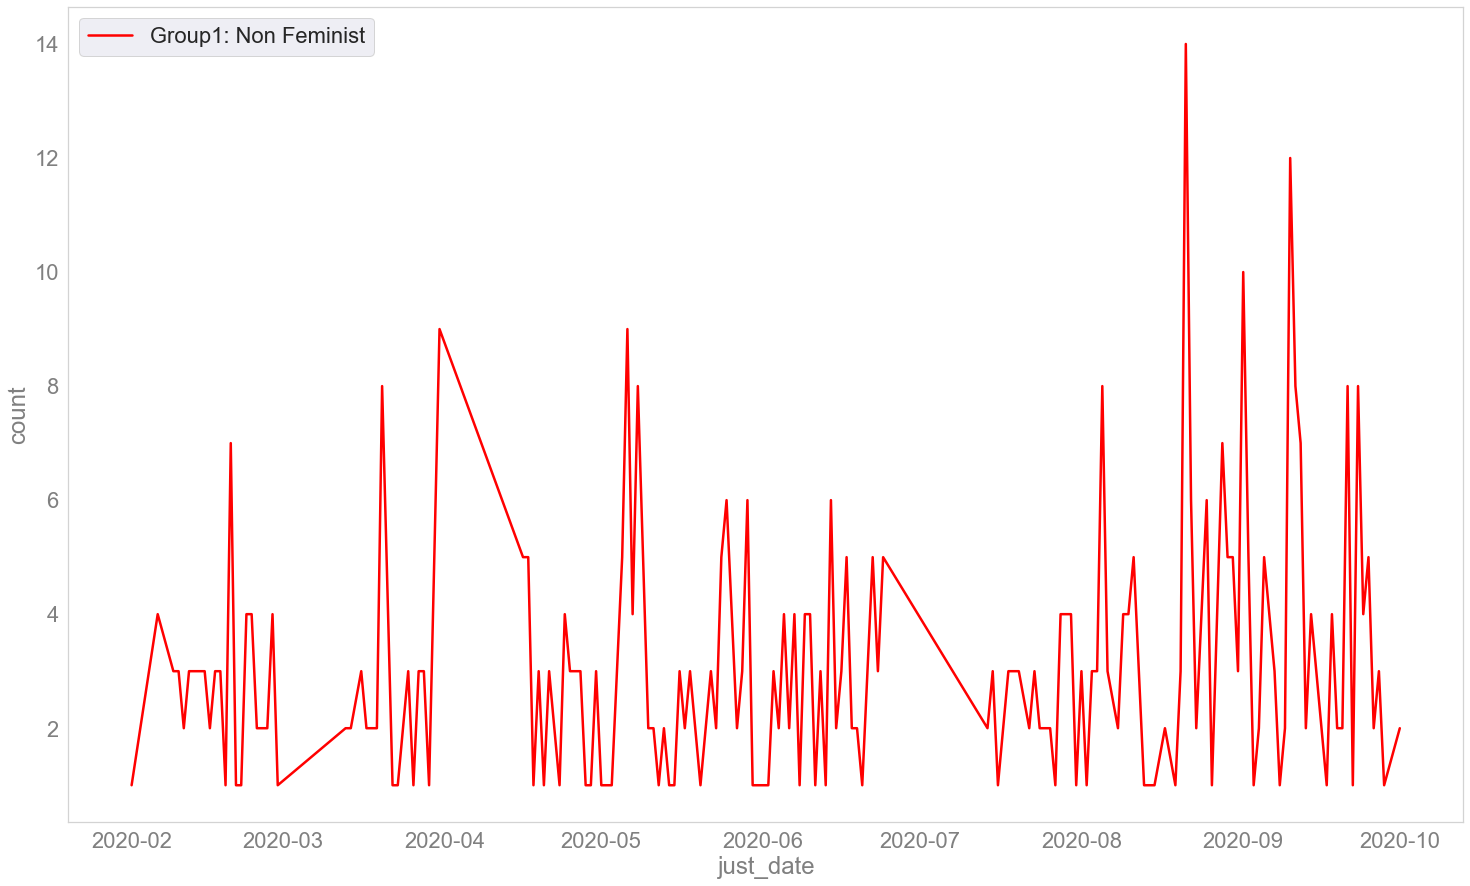

In [51]:
themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

#palette = sns.color_palette("inferno", nr_hash)


fig, ax = plt.subplots(figsize=a4_dims)
sns.set(font_scale = 2)

ax = sns.lineplot(x="just_date", y="count", 
                  label = "Group1: Non Feminist",
                  color = "red",
                  linewidth = 2.5, data = df2)

In [52]:
for i in df["text"]:
    print(i)
    print("\n")

RT @Rigspoliti: Det er egentlig ret simpelt #covid19dk #politidk  #blivhjemme https://t.co/oH2lu3zjPK


RT @regeringDK: Tak til alle, der passer på os. ❤️ – og tak, fordi I holder afstand. #sammenmodcorona #sammenhverforsig #dkpol #covid19dk https://t.co/gpXddnsq4L


Foreningen Far har spurgt ca. 2.000 fædre om der sker kønsdiskrimination i Danmark år 2020 https://t.co/tLy8RjPerY @Astridkrag @MogensJensenS  #dkpol #dkmedier @DRNyheder @tv2newsdk @Altingetdk  @berlingske @jyllandsposten @informeren @DanskeDomstole @menneskeret  #Danmark


@Atmazphere Vil du være venlig at tale pænt til og om Karen?


@MadsBis @ThiesenMette Hvem tror du selv? Enhedslisten og Radikale Venstre vil være et godt bud i denne sammenhæng.


@MVentegodt Mener @menneskeret ikke Foreningen Far bør have de fleste midler. Vi står med langt de fleste voldsramte børn og fædre i Danmark, men ser ikke en krone. Få saglighed i tingene for ofrenes skyld! https://t.co/69l6tmHtYA #dkpol @politiken https://t.co/tdkKsVylcZ




## Check within groups per users

In [8]:
def RT_to_namescount_df(filename, groupname):
    df = pd.read_csv(filename).drop_duplicates().reset_index(drop = True)
    
    df["created_at"] = pd.to_datetime(df["created_at"], utc=True)
    df['just_date'] = df['created_at'].dt.date
    
    whole = df.groupby('screen_names')['id_str'].count()
    whole = whole.to_frame().reset_index().rename(columns={"id_str": "Total"})
    
    retweets = df[df["retweets"] == True].reset_index(drop=True).groupby('screen_names')['id_str'].count()
    retweets = retweets.to_frame().reset_index().rename(columns={"id_str": "Retweets"})
    
    df = pd.merge(whole, retweets)
    df["Group"] = groupname
    
    return df

In [9]:
df0 = RT_to_namescount_df(files[0], "Group1")
df1 = RT_to_namescount_df(files[1], "Group2")
df2 = RT_to_namescount_df(files[2], "Group3")
df3 = RT_to_namescount_df(files[3], "Group4")
df4 = RT_to_namescount_df(files[4], "Group5")
df5 = RT_to_namescount_df(files[5], "Group6")

In [10]:
data = pd.concat([df0, df1, df2, df3, df4, df5]).reset_index(drop = True)
data

,screen_names,Total,Retweets,Group
0,AllanSchmidt,3890,249,Group1
1,TobiasPetersen_,971,11,Group1
2,gaard_Hans,561,41,Group1
3,torstenfroling,224,9,Group1
4,BrianMork,1313,15,Group2
5,cc02aa2aecb8441,949,84,Group2
6,memiliussen,968,35,Group2
7,1976Bullet,37,37,Group3
8,AndersWendtJens,12,5,Group3
9,ForeningenFar,196,20,Group3


<AxesSubplot:xlabel='Retweets', ylabel='screen_names'>

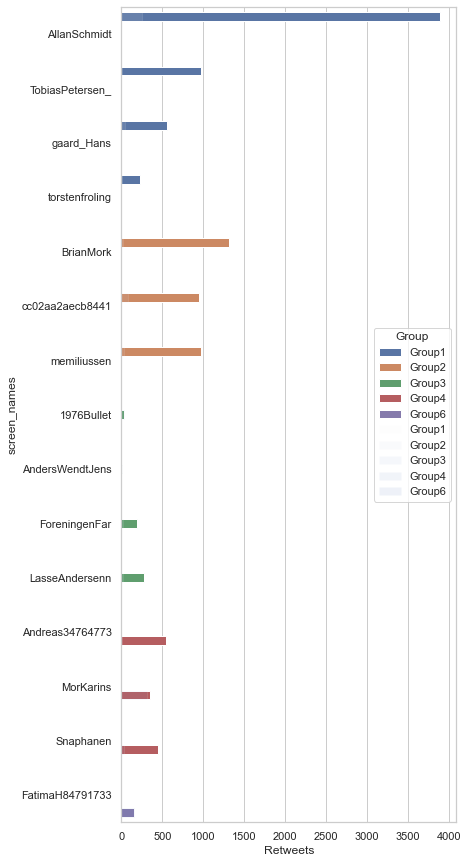

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total tweet counts
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="screen_names", 
            data=data, hue="Group",
            #label="Total", 
            #color="b"
           )

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Retweets", y="screen_names", hue="Group", data=data,
            #label="Retweets", 
            color="b",
            alpha=0.1
           )

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
#ax.set(ylabel="",
#       xlabel="Users tweets vs  RT's")

#sns.despine(left=True, bottom=True)

# Check hashtags

In [53]:
df = pd.read_csv(files[2]).drop_duplicates().reset_index(drop = True)

In [54]:
df["text"][6]

'@Avoduden Det smager godt.'

In [60]:
import re
def extract_hashtags(row):
    unique_hashtag_list = list(re.findall(r'#\S*\w', row["text"]))
    return unique_hashtag_list

def hashtag_per_row(data):
    # Create hashtags column with the actual unique hashtags
    data["hashtags"] = data.apply(lambda row: extract_hashtags(row), axis = 1)
    
    data["created_at"] = pd.to_datetime(data["created_at"], utc=True)
    data['just_date'] = data['created_at'].dt.date

    # Let's take a subset of necessary columns, add id
    df = data[["just_date", "hashtags"]].reset_index().rename(columns={"index": "id"})

    # Select only the ones where we have more than 1 hashtag per tweet
    df = df[df["hashtags"].map(len) > 1].reset_index(drop=True)

    # Hashtag per row
    # convert list of pd.Series then stack it
    df = (df
     .set_index(['just_date','id'])['hashtags']
     .apply(pd.Series)
     .stack()
     .reset_index()
     .drop('level_2', axis=1)
     .rename(columns={0:'hashtag'}))
    #lowercase!
    df["hashtag"] = df["hashtag"].str.lower()
    df["hashtag"] = df["hashtag"].str.replace("'.", "")
    df["hashtag"] = df["hashtag"].str.replace("’.", "")
    
    df = df.reset_index()

    return df

def hashtags_visual(filename, count_nr, groupname):
    df = pd.read_csv(filename).drop_duplicates().reset_index(drop = True)
    hashtags = hashtag_per_row(df)
    
    f = hashtags.groupby('hashtag')['index'].count()
    f = f.to_frame().reset_index().rename(columns={"index": "count"})

    freq_data = f.sort_values(by=['count'], ascending=False).reset_index(drop=False)[0:count_nr]

    fig, ax = plt.subplots(figsize=(25,15))

    themes.theme_minimal(grid=False, ticks=False, fontsize=18)
    #palette = sns.color_palette("inferno", nr_hash)

    ax = sns.barplot(y="hashtag", x="count", 
                     #palette = palette, 
                     data = freq_data)

    ax.set(xlabel="Count", ylabel = "Hashtag")
    ax.xaxis.get_label().set_fontsize(25)
    ax.yaxis.get_label().set_fontsize(25)
    ax.axes.set_title(groupname,fontsize=30)

    plt.xticks(fontsize=30)
    plt.yticks(fontsize=40)
    sns.set(font_scale = 4)

<ipython-input-60-360db50184bf>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df["hashtag"] = df["hashtag"].str.replace("'.", "")
<ipython-input-60-360db50184bf>:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df["hashtag"] = df["hashtag"].str.replace("’.", "")


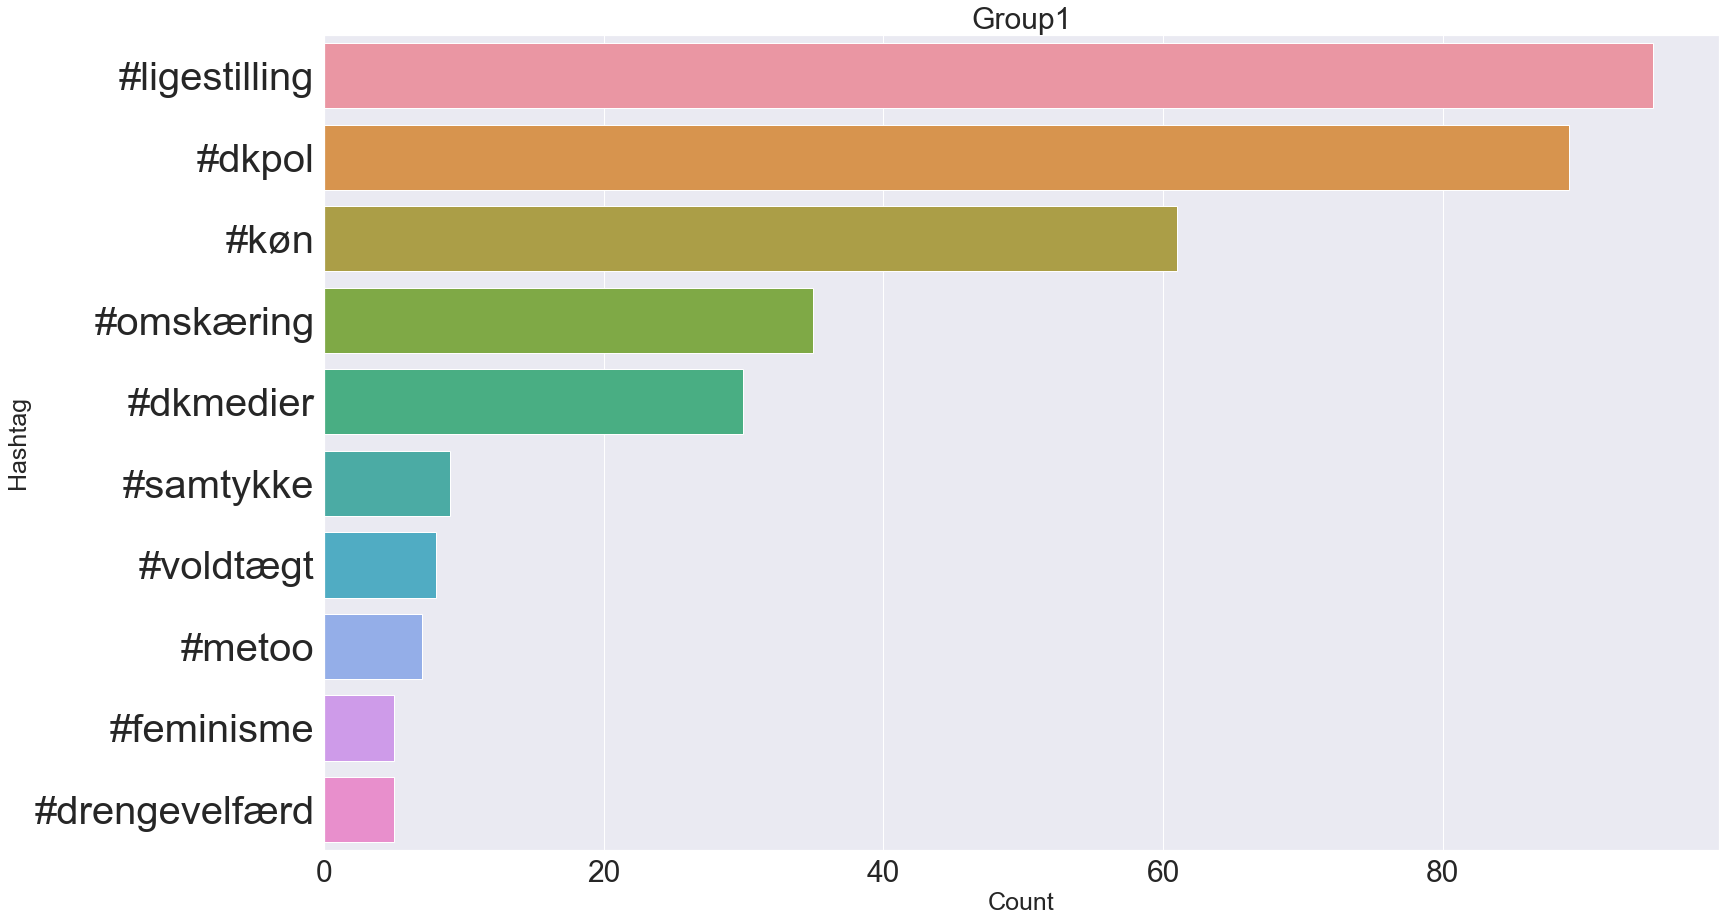

In [63]:
hashtags_visual(files[0], 10, "Group1")

<ipython-input-60-360db50184bf>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df["hashtag"] = df["hashtag"].str.replace("'.", "")
<ipython-input-60-360db50184bf>:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df["hashtag"] = df["hashtag"].str.replace("’.", "")


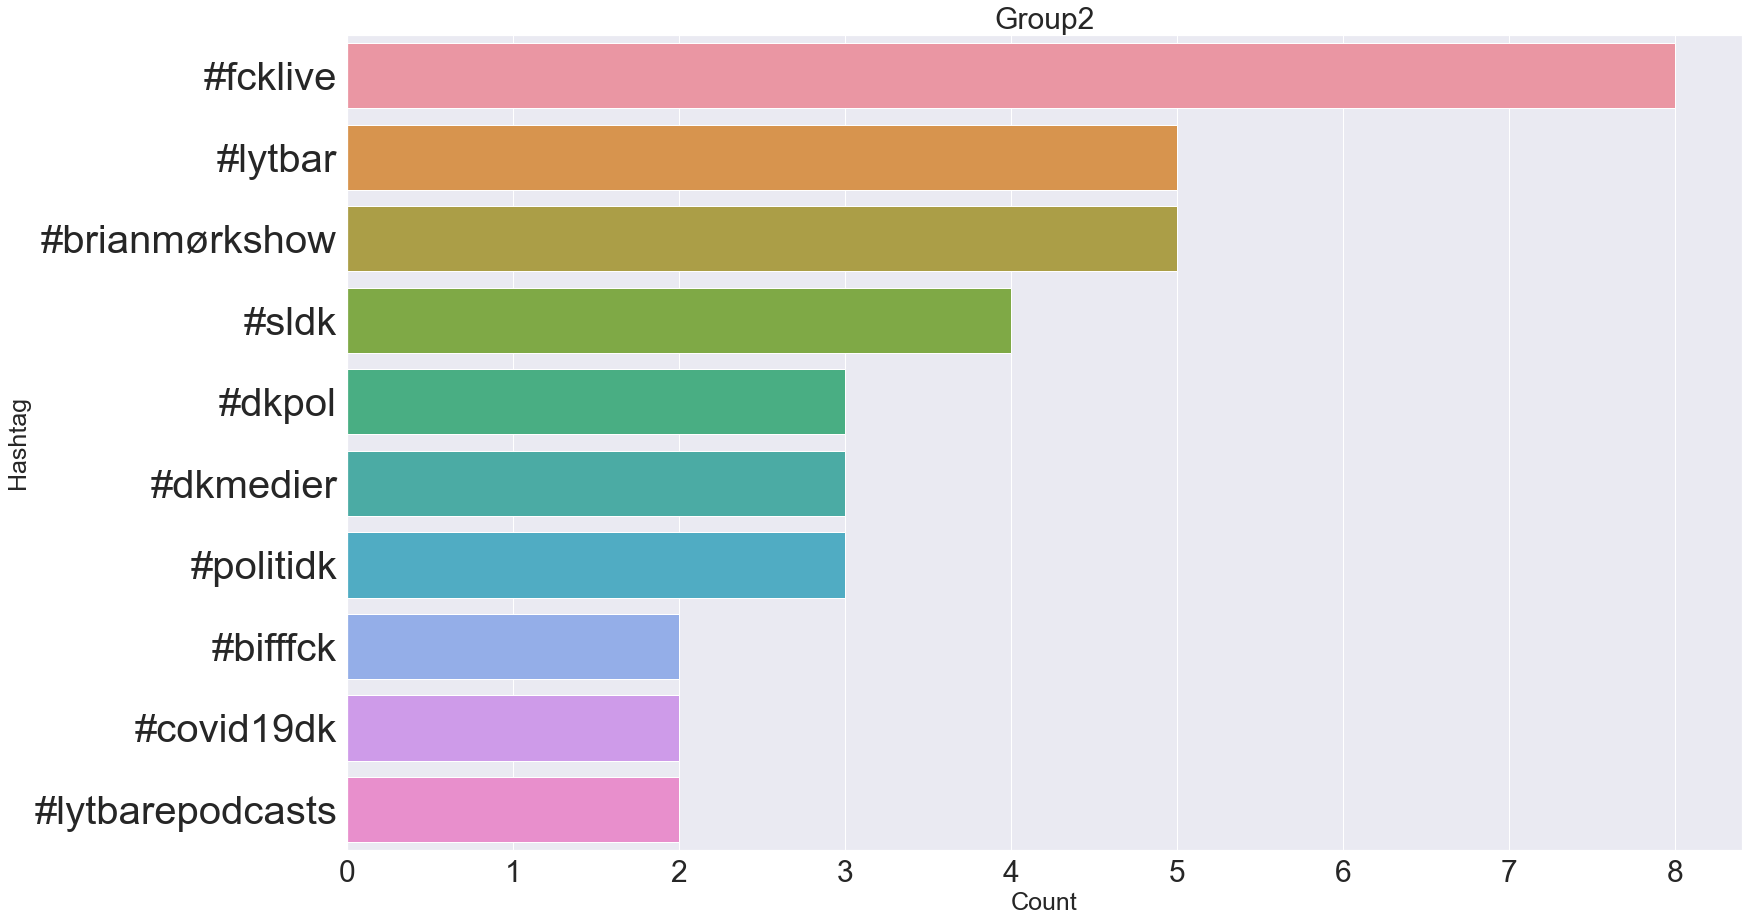

In [64]:
hashtags_visual(files[1], 10, "Group2")

<ipython-input-60-360db50184bf>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df["hashtag"] = df["hashtag"].str.replace("'.", "")
<ipython-input-60-360db50184bf>:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df["hashtag"] = df["hashtag"].str.replace("’.", "")


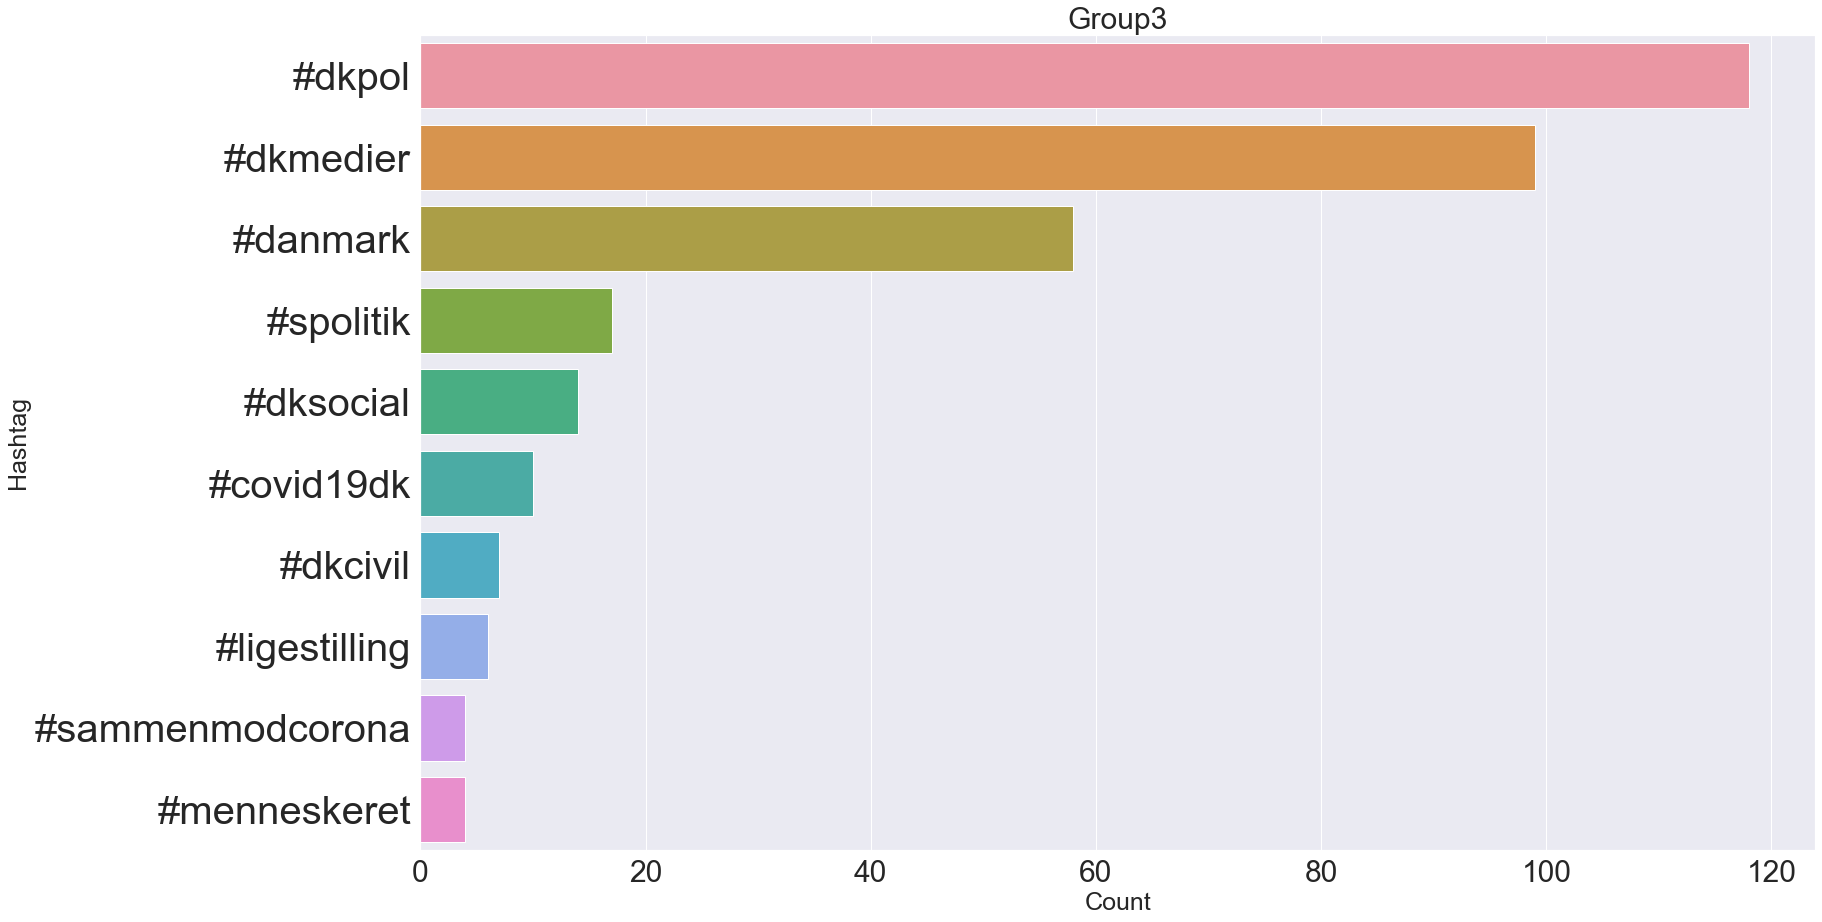

In [65]:
hashtags_visual(files[2], 10, "Group3")

<ipython-input-60-360db50184bf>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df["hashtag"] = df["hashtag"].str.replace("'.", "")
<ipython-input-60-360db50184bf>:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df["hashtag"] = df["hashtag"].str.replace("’.", "")


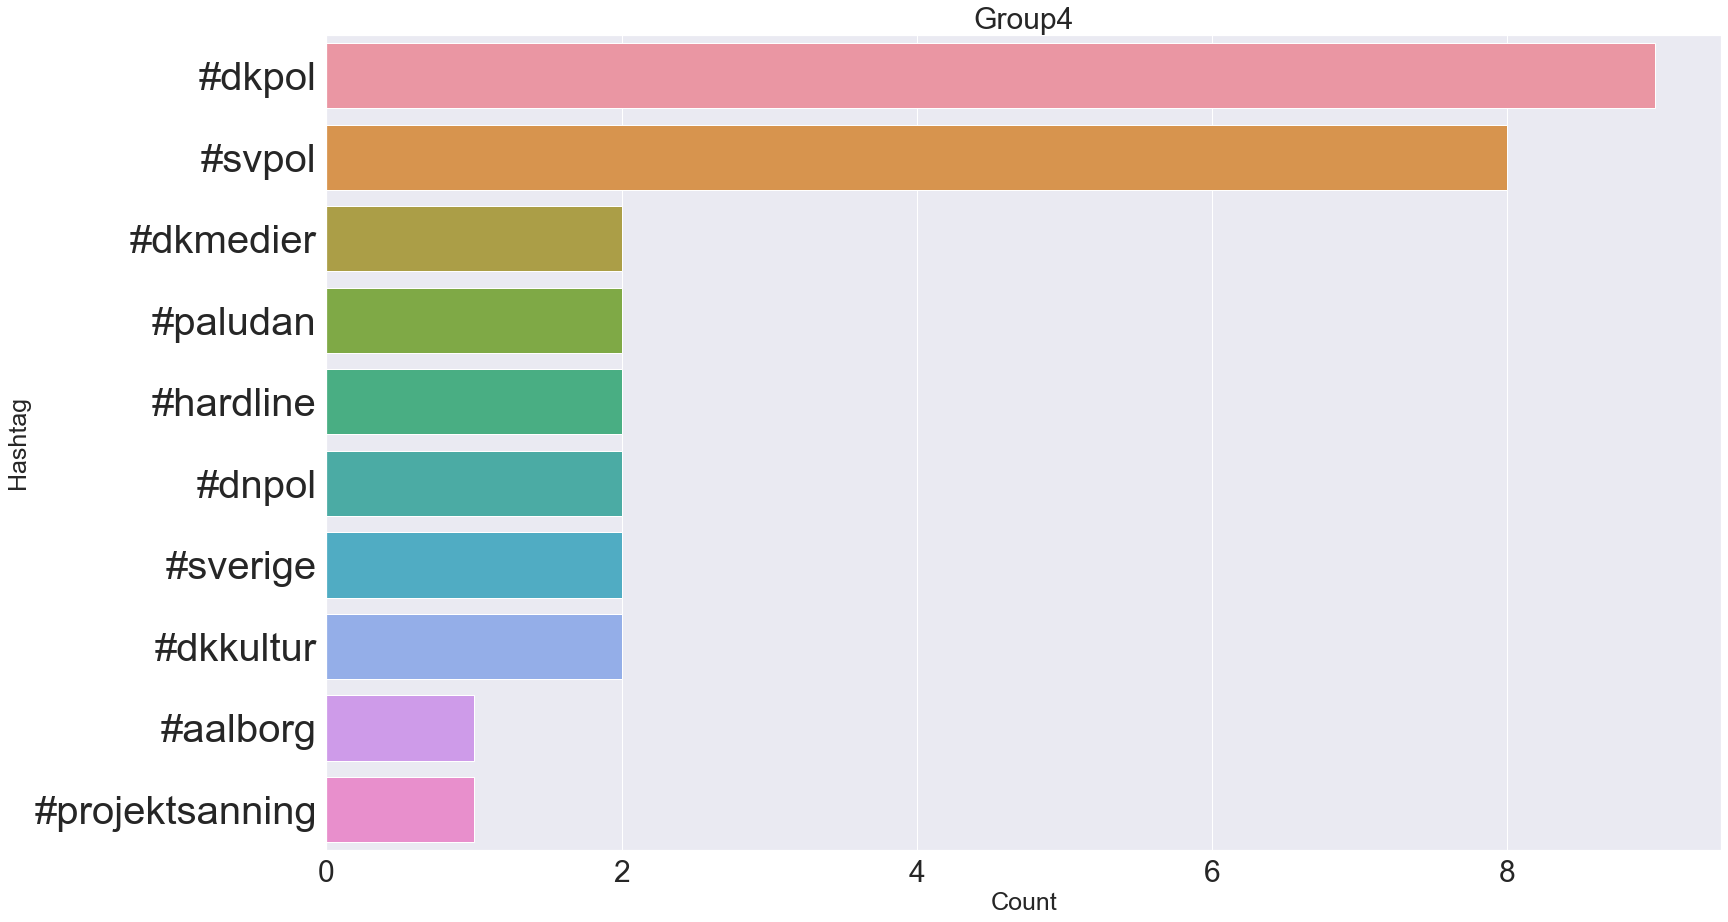

In [66]:
hashtags_visual(files[3], 10, "Group4")

In [67]:
hashtags_visual(files[4], 10, "Group5")

AttributeError: 'Series' object has no attribute 'stack'